In [2]:
#This non-functional cell somehow makes the last one work, don't ask me I don't know how it just does
import matplotlib.backends.backend_pdf as backend_pdf
from matplotlib import pyplot as plt
from io import StringIO
import sys

# Create a multi-page PDF
output_pdf_path = os.path.join(directory, "CLAS_F2_summary.pdf")
pdf = backend_pdf.PdfPages(\Users\castl\Desktop\F_2^P)

# Save the current plot to the PDF
fig = plt.figure(figsize=(12, 8))
for q2_value in sorted_q2_values:
    datasets = q2_data[q2_value]
    color = q2_color_map[q2_value]
    for i, data in enumerate(datasets):
        if len(data['x']) > 0 and len(data['f2']) > 0:
            label = f"Q² = {q2_value}" if i == 0 else ""
            plt.errorbar(data['x'], data['f2'], yerr=data['stat'], 
                         fmt='o-', color=color, label=label, 
                         alpha=0.7, capsize=3, markersize=4)

plt.xlabel('$x$')
plt.ylabel('$F_2^P$')
plt.title('CLAS: $e+p \\rightarrow e+X$ scattering, $F_2^P$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
pdf.savefig(fig)
plt.close()

# Capture the summary text
summary_buffer = StringIO()
sys.stdout = summary_buffer

print("\nSummary of plotted data:")
print(f"Total Q² values found: {len(sorted_q2_values)}")
for q2_value in sorted_q2_values:
    datasets = q2_data[q2_value]
    total_points = sum(len(data['x']) for data in datasets)
    print(f"Q² = {q2_value}: {len(datasets)} dataset(s), {total_points} total points, color: {q2_color_map[q2_value]}")

print(f"\nQ² color mapping: {q2_color_map}")
print(f"All Q² values: {sorted(all_q2_values)}")

# Reset stdout and get captured text
sys.stdout = sys.__stdout__
summary_text = summary_buffer.getvalue()

# Add a page to the PDF for the summary text
from matplotlib.figure import Figure
fig_text = Figure(figsize=(12, 8))
ax = fig_text.add_subplot(111)
ax.axis('off')
ax.text(0, 1, summary_text, fontsize=10, verticalalignment='top', family='monospace')
pdf.savefig(fig_text)

# Close PDF file
pdf.close()

print(f"PDF saved to: {r"C:\Users\castl\Desktop\F_2^P}")


SyntaxError: unexpected character after line continuation character (453297446.py, line 9)

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import io
import sys

In [11]:
# Define the directory and file names
directory=r"C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\CLAS_data\2...HEPData-ins612145-v1-csv"
files=[f'Table{i}.csv' for i in range(1, 4)]  # Adjust file numbers as needed, upper bound is not included in plot

In [12]:
# Debugging current directory
print("Current directory:", os.getcwd())
print("Looking for files in:", os.path.join(directory, files[0]))

starting_q2=0.225
step_q2=0.05
blocks_per_file=2

Current directory: C:\Users\castl
Looking for files in: C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\CLAS_data\2...HEPData-ins612145-v1-csv\Table1.csv


In [13]:
# Extract table numbers directly from filenames
table_numbers=[int(f.replace('Table', '').replace('.csv', '')) for f in files]

q2_mapping={
    idx: [round(starting_q2 + step_q2 * ((table_num - 1) * blocks_per_file + i), 3)
          for i in range(blocks_per_file)]
    for idx, table_num in enumerate(table_numbers)
}

In [14]:
# Create a unified Q² to color mapping
all_q2_values=[]
for q2_list in q2_mapping.values():
    all_q2_values.extend(q2_list)

In [15]:
# Define colors for each unique Q² value - ensure we have enough colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
q2_color_map = {q2: colors[i % len(colors)] for i, q2 in enumerate(sorted(all_q2_values))}

In [16]:
# Data containers organized by Q² value
q2_data={q2: [] for q2 in all_q2_values}

In [17]:
# Function to split data blocks based on Q² headers or blank rows
def split_data_blocks(df):
    splits = []
    current_data = []
    
    for idx, row in df.iterrows():
        # Check if this is a header row (contains Q**2 information)
        if pd.notna(row.iloc[0]) and isinstance(row.iloc[0], str) and 'Q**2' in str(row.iloc[0]):
            # If we have accumulated data, save it as a block
            if current_data:
                splits.append(pd.DataFrame(current_data))
                current_data = []
            continue
        
        # Check if this is a column header row
        if pd.notna(row.iloc[0]) and str(row.iloc[0]).strip() == 'X':
            continue
            
        # Check if this is a blank row
        if row.isnull().all():
            if current_data:
                splits.append(pd.DataFrame(current_data))
                current_data = []
            continue
            
        # Check if this is a data row (first column should be numeric)
        try:
            float(row.iloc[0])
            current_data.append(row)
        except (ValueError, TypeError):
            # Skip non-numeric rows
            continue
    
    # Don't forget the last block
    if current_data:
        splits.append(pd.DataFrame(current_data))
    
    return splits

In [18]:
# Capture print output for PDF
output_buffer=io.StringIO()
original_stdout=sys.stdout

In [19]:
# Read and process each file
for file_idx, file in enumerate(files):
    file_path = os.path.join(directory, file)
    try:   
        # Read the entire file as text first to handle the mixed format
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Create a DataFrame from all lines
        df = pd.DataFrame([line.strip().split(',') for line in lines])
        
        print(f"\nFile {file} structure:")
        print(f"Shape: {df.shape}")
        print(f"First few rows:\n{df.head(10)}")
        
        sub_datasets = split_data_blocks(df)
        print(f"File {file}: Found {len(sub_datasets)} data blocks")
        
        for block_idx, sub_df in enumerate(sub_datasets):
            if len(sub_df) == 0:
                continue
                
            sub_df.reset_index(drop=True, inplace=True)
            
            # Skip if we don't have enough columns
            if sub_df.shape[1] < 6:
                continue
                
            # Convert columns to numeric, handling missing values
            try:
                x_vals = pd.to_numeric(sub_df.iloc[:, 0], errors='coerce')
                f2_vals = pd.to_numeric(sub_df.iloc[:, 1], errors='coerce')
                stat_plus = pd.to_numeric(sub_df.iloc[:, 2], errors='coerce')
                stat_minus = pd.to_numeric(sub_df.iloc[:, 3], errors='coerce')
                sys_plus = pd.to_numeric(sub_df.iloc[:, 4], errors='coerce')
                sys_minus = pd.to_numeric(sub_df.iloc[:, 5], errors='coerce')
                
                # Remove rows with NaN values
                valid_mask = ~(x_vals.isna() | f2_vals.isna() | stat_plus.isna() | stat_minus.isna())
                x_vals = x_vals[valid_mask].values
                f2_vals = f2_vals[valid_mask].values
                stat_plus = stat_plus[valid_mask].values
                stat_minus = stat_minus[valid_mask].values
                sys_plus = sys_plus[valid_mask].values
                sys_minus = sys_minus[valid_mask].values
                
                # Calculate uncertainties
                stat_vals = np.abs(stat_plus - stat_minus) / 2
                sys_vals = np.abs(sys_plus - sys_minus) / 2
                
                # Get the Q² value for this file and block
                if file_idx in q2_mapping and block_idx < len(q2_mapping[file_idx]):
                    q2_value = q2_mapping[file_idx][block_idx]
                    
                    # Store data organized by Q² value
                    q2_data[q2_value].append({
                        'x': x_vals,
                        'f2': f2_vals,
                        'stat': stat_vals,
                        'sys': sys_vals
                    })
                    
                    print(f"Processed block {block_idx+1} in {file} (Q²={q2_value}) | Rows: {len(x_vals)}")
                else:
                    print(f"Warning: No Q² mapping found for file {file_idx}, block {block_idx}")
                    
            except Exception as e:
                print(f"Error processing data block {block_idx} in {file}: {e}")
                continue
                
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file}: {e}")


File Table1.csv structure:
Shape: (102, 6)
First few rows:
                                                   0              1     2  \
0         #: table_doi: 10.17182/hepdata.12253.v1/t1           None  None   
1                                   #: name: Table 1           None  None   
2           #: description: No description provided.           None  None   
3                          #: data_file: Table1.yaml           None  None   
4                #: keyword reactions: E- P --> E- X           None  None   
5                         #: keyword observables: F2           None  None   
6  #: keyword phrases: Inclusive | Structure Func...           None  None   
7                     #: keyword cmenergies: 0.0-2.5           None  None   
8                                    #: Q**2 [GeV^2]          0.225  None   
9                                              #: RE  E- P --> E- X  None   

      3     4     5  
0  None  None  None  
1  None  None  None  
2  None  None  None  
3  N


Summary of plotted data:
Total Q² values found: 6
Q² = 0.225: 1 dataset(s), 35 total points, color: tab:blue
Q² = 0.275: 1 dataset(s), 39 total points, color: tab:orange
Q² = 0.325: 1 dataset(s), 41 total points, color: tab:green
Q² = 0.375: 1 dataset(s), 43 total points, color: tab:red
Q² = 0.425: 1 dataset(s), 45 total points, color: tab:purple
Q² = 0.475: 1 dataset(s), 55 total points, color: tab:brown

Q² color mapping: {0.225: 'tab:blue', 0.275: 'tab:orange', 0.325: 'tab:green', 0.375: 'tab:red', 0.425: 'tab:purple', 0.475: 'tab:brown'}
All Q² values: [0.225, 0.275, 0.325, 0.375, 0.425, 0.475]



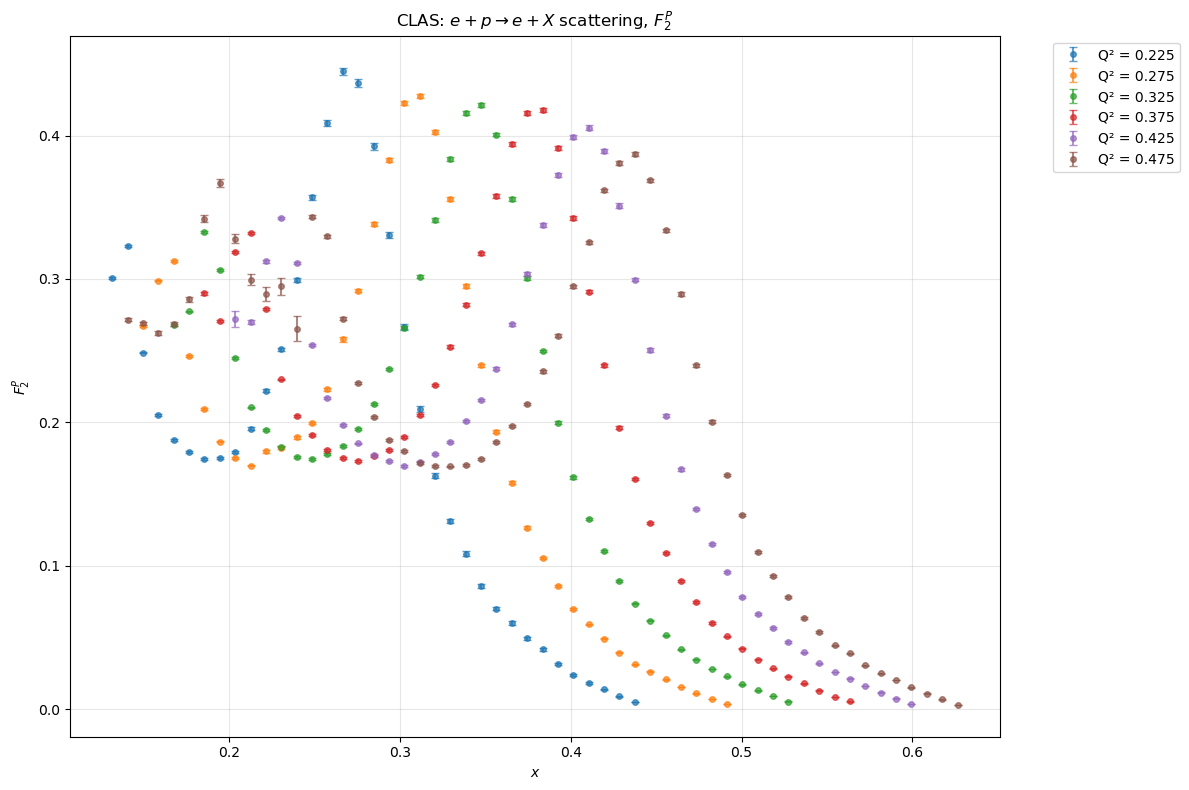

In [20]:
# Sorting, Plotting, and Summary
plt.figure(figsize=(12, 8))

# Sort Q² values for consistent plotting order
sorted_q2_values=sorted([q2 for q2 in q2_data.keys() if q2_data[q2]])

for q2_value in sorted_q2_values:
    datasets=q2_data[q2_value]
    color=q2_color_map[q2_value]
    
    # Plot all datasets for this Q² value with the same color
    # Only the first dataset gets a label to avoid duplicate legend entries
    for i, data in enumerate(datasets):
        if len(data['x']) > 0 and len(data['f2']) > 0:
            # Create label only for the first dataset of each Q² value
            label = f"Q² = {q2_value}" if i == 0 else ""
            
            plt.errorbar(data['x'], data['f2'], yerr=data['stat'], 
                        fmt='o', color=color, label=label, 
                        alpha=0.7, capsize=3, markersize=4)

plt.xlabel('$x$')
plt.ylabel('$F_2^P$')
plt.title('CLAS: $e+p \\rightarrow e+X$ scattering, $F_2^P$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)

# Capture the print output
sys.stdout = output_buffer

# Print summary of what was plotted
print("\nSummary of plotted data:")
print(f"Total Q² values found: {len(sorted_q2_values)}")
for q2_value in sorted_q2_values:
    datasets = q2_data[q2_value]
    total_points = sum(len(data['x']) for data in datasets)
    print(f"Q² = {q2_value}: {len(datasets)} dataset(s), {total_points} total points, color: {q2_color_map[q2_value]}")

print(f"\nQ² color mapping: {q2_color_map}")
print(f"All Q² values: {sorted(all_q2_values)}")

# Get the captured output
captured_output = output_buffer.getvalue()
sys.stdout = original_stdout

# Display the summary on screen as well
print(captured_output)

# Show the plot
plt.show()